In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("dark_background")
plt.style.use('seaborn-v0_8-white')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 120
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Читаем данные
df = pd.read_csv('ecommerce_ABC.csv', parse_dates = ['Order Date'])
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,$46.00,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,$112.00,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,$31.20,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,$26.20,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,$160.00,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [3]:
# Выведем список всех столбцов, чтобы удобнее было выбрать нужные
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

In [4]:
# Оставим только интересующие нас столбцы
df_work = df[['Order Date', 'Months', 'Product Category', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit']]
df_work

,Order Date,Months,Product Category,Product,Sales,Quantity,Discount,Profit
0,2015-11-09,Nov,Auto & Accessories,Car Media Players,$140.00,2,0.05,$46.00
1,2015-06-30,Jun,Auto & Accessories,Car Speakers,$211.00,3,0.03,$112.00
2,2015-12-05,Dec,Auto & Accessories,Car Body Covers,$117.00,5,0.01,$31.20
3,2015-05-09,May,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,$26.20
4,2015-07-09,Jul,Auto & Accessories,Tyre,$250.00,1,0.04,$160.00
...,...,...,...,...,...,...,...,...
51285,2015-01-21,Jan,Fashion,Sports Wear,$85.00,5,0.04,$17.00
51286,2015-06-22,Jun,Fashion,Sports Wear,$85.00,1,0.03,$2.50
51287,2015-01-01,Jan,Fashion,Sports Wear,$85.00,1,0.05,$0.80
51288,2015-12-07,Dec,Fashion,Sports Wear,$85.00,3,0.04,$28.30


In [5]:
# Посмотрим на размер и типы данных
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        51289 non-null  datetime64[ns]
 1   Months            51290 non-null  object        
 2   Product Category  51290 non-null  object        
 3   Product           51290 non-null  object        
 4   Sales             51290 non-null  object        
 5   Quantity          51289 non-null  object        
 6   Discount          51290 non-null  object        
 7   Profit            51290 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 3.1+ MB


In [6]:
# Посмотрим есть ли пропуски
df_work.isnull().sum()

Order Date          1
Months              0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
dtype: int64

#### Видим, что столбцы с числовыми данными представленны в виде текста, также есть пропуски, исправим это

In [7]:
# Посмотрим на уникальные значения в столбце Quantity
df_work['Quantity'].value_counts()

4      6631
3      6564
5      6547
1      6542
2      6482
1      3756
3      3743
2      3727
5      3649
4      3647
abc       1
Name: Quantity, dtype: int64

In [8]:
df_work.query("Quantity == 'abc'")

,Order Date,Months,Product Category,Product,Sales,Quantity,Discount,Profit
321,2015-04-21,Apr,Auto & Accessories,Car Mat,$54.00,abc,0.02,$54.00


In [9]:
# Преобразуем данные таким образом, чтобы явный текст превратился в nan, а все остальное в числовые значения
df_work['Quantity'] = pd.to_numeric(df_work['Quantity'], errors = 'coerce')
# Удалим пропуски (бывшие явные текстовые значения, которые стали nan)
df_work = df_work.dropna()
# Представим значения в виде целых чисел
df_work['Quantity'] = df_work['Quantity'].astype(int)

In [10]:
# Проверим результат
df_work['Quantity'].value_counts()

3    10307
1    10298
4    10278
2    10209
5    10195
Name: Quantity, dtype: int64

In [11]:
# Посмотрим на уникальные значения в столбце Discount
df_work['Discount'].value_counts()

0.02    6636
0.03    6577
0.01    6558
0.05    6503
0.04    6490
0.03    3781
0.04    3764
0.01    3683
0.05    3669
0.02    3625
xxx        1
Name: Discount, dtype: int64

In [12]:
# Преобразуем данные таким образом, чтобы явный текст превратился в nan, а все остальное в числовые значения
df_work['Discount'] = pd.to_numeric(df_work['Discount'], errors = 'coerce')
# Удалим пропуски (бывшие явные текстовые значения, которые стали nan)
df_work = df_work.dropna()

In [13]:
# Проверим результат
df_work['Discount'].value_counts()

0.03    10358
0.02    10261
0.04    10254
0.01    10241
0.05    10172
Name: Discount, dtype: int64

In [14]:
# Посмотрим на уникальные значения в столбце Sales
df_work['Sales'].value_counts()

$228.00     3823
$85.00      2827
$159.00     2796
$109.00     2795
$62.00      2795
$213.00     2795
$224.00     2795
$122.00     2795
$248.00     2794
$196.00     2794
$218.00     2794
$211.00     1852
$250.00     1113
$133.00     1053
$70.00      1029
$124.00     1029
$119.00     1029
$78.00      1029
$67.00      1029
$34.00      1028
$216.00     1027
$231.00      829
$114.00      827
$140.00      826
$118.00      826
$117.00      826
$54.00       825
$72.00       825
$130.00      261
$65.00       224
$192.00      224
$83.00       224
$33.00       221
$111.00      221
$199.00      221
$222.00      221
$149.00      221
$104.00      221
$220.00      221
0.xf           1
Name: Sales, dtype: int64

In [15]:
# Уберем знак доллара $
df_work['Sales'] = df_work['Sales'].str.replace('$', '')
# Преобразуем данные таким образом, чтобы явный текст превратился в nan, а все остальное в числовые значения
df_work['Sales'] = pd.to_numeric(df_work['Sales'], errors = 'coerce')
# Удалим пропуски (бывшие явные текстовые значения, которые стали nan)
df_work = df_work.dropna()
# Представим значения в виде целых чисел
df_work['Sales'] = df_work['Sales'].astype(int)

In [16]:
# Проверим результат
df_work['Sales'].value_counts()

228    3823
85     2827
159    2796
213    2795
62     2795
224    2795
122    2795
109    2795
196    2794
248    2794
218    2794
211    1852
250    1113
133    1053
67     1029
70     1029
124    1029
119    1029
78     1029
34     1028
216    1027
231     829
114     827
140     826
118     826
117     826
54      825
72      825
130     261
65      224
192     224
83      224
33      221
111     221
199     221
222     221
149     221
104     221
220     221
Name: Sales, dtype: int64

In [17]:
# Посмотрим на уникальные значения в столбце Profit
df_work['Profit'].value_counts()

$17.00     670
$31.00     630
$62.00     590
$20.70     579
$12.40     560
          ... 
$67.50       7
$81.30       6
$85.00       6
$21.00       6
$48.70       2
Name: Profit, Length: 391, dtype: int64

In [18]:
# Уберем знак доллара $
df_work['Profit'] = df_work['Profit'].str.replace('$', '')
# Преобразуем данные таким образом, чтобы явный текст превратился в nan, а все остальное в числовые значения
df_work['Profit'] = pd.to_numeric(df_work['Profit'], errors = 'coerce')
# Удалим пропуски (бывшие явные текстовые значения, которые стали nan)
df_work = df_work.dropna()

In [19]:
# Проверим результат
df_work['Profit'].value_counts()

17.0    670
31.0    630
62.0    590
20.7    579
12.4    560
       ... 
67.5      7
81.3      6
85.0      6
21.0      6
48.7      2
Name: Profit, Length: 391, dtype: int64

In [20]:
# Проверим на дубликаты
df_work.duplicated().sum()

5268

In [21]:
# Дубликаты есть, удалим их
df_work = df_work.drop_duplicates()

In [22]:
df_work.describe()

,Sales,Quantity,Discount,Profit
count,46017.000000,46017.000000,46017.000000,46017.000000
mean,155.594758,2.998522,0.029966,72.183880
std,65.958331,1.412998,0.014119,49.099667
min,33.000000,1.000000,0.010000,0.500000
25%,109.000000,2.000000,0.020000,25.700000
50%,159.000000,3.000000,0.030000,64.700000
75%,218.000000,4.000000,0.040000,120.500000
max,250.000000,5.000000,0.050000,167.500000


### Предобработка данных закончена, приступаем к ABC анализу

In [23]:
# Посмотрим за какие даты у нас данные
df_work['Order Date'].describe()

count                   46017
unique                    365
top       2015-07-22 00:00:00
freq                      155
first     2015-01-01 00:00:00
last      2015-12-31 00:00:00
Name: Order Date, dtype: object

#### У нас данные за полный 2015 год, с этими данными и будем работать ничего не меняя

In [24]:
df_work.head()

,Order Date,Months,Product Category,Product,Sales,Quantity,Discount,Profit
0,2015-11-09,Nov,Auto & Accessories,Car Media Players,140,2,0.05,46.0
1,2015-06-30,Jun,Auto & Accessories,Car Speakers,211,3,0.03,112.0
2,2015-12-05,Dec,Auto & Accessories,Car Body Covers,117,5,0.01,31.2
3,2015-05-09,May,Auto & Accessories,Car & Bike Care,118,2,0.05,26.2
4,2015-07-09,Jul,Auto & Accessories,Tyre,250,1,0.04,160.0


In [25]:
# Посчитаем выручку как стоимость товара умноженная на его кол-во, за вычетом скидки
df_work['Revenue'] = df_work['Sales'] * df_work['Quantity'] * (1 - df_work['Discount'])

In [26]:
# Создадим столбец с номером месяца
df_work['Month_num'] = df_work['Order Date'].dt.month

Text(0, 0.5, 'TOTAL QUANTITY')

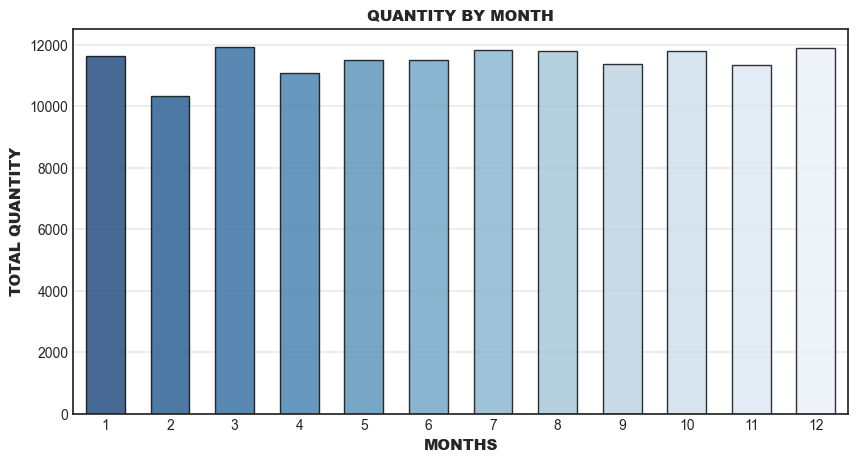

In [27]:
# Отобразим на графике кол-во проданных товаров по месяцам
fig, ax = plt.subplots(figsize = (10, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = df_work,
    x = df_work.groupby('Month_num').first().index,
    y = df_work.groupby('Month_num')['Quantity'].sum().values,
    edgecolor = 'black',
    dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('QUANTITY BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTHS', fontsize = 11, fontweight = 800)
ax.set_ylabel('TOTAL QUANTITY', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'TOTAL REVENUE')

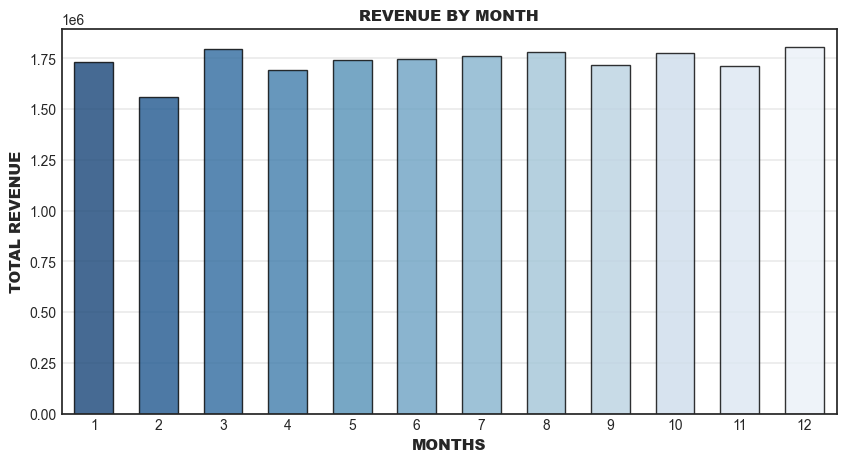

In [28]:
# Отобразим на графике выручку по месяцам
fig, ax = plt.subplots(figsize = (10, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = df_work,
    x = df_work.groupby('Month_num').first().index,
    y = df_work.groupby('Month_num')['Revenue'].sum().values,
    edgecolor = 'black',
    dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('REVENUE BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTHS', fontsize = 11, fontweight = 800)
ax.set_ylabel('TOTAL REVENUE', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'TOTAL PROFIT')

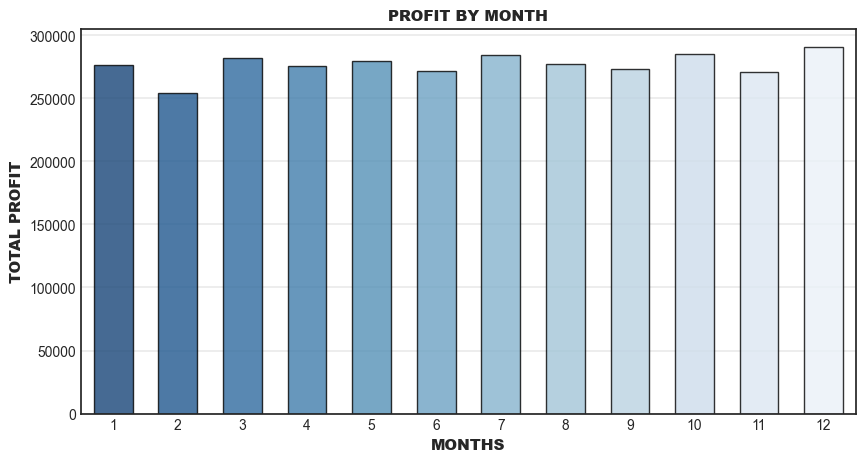

In [29]:
# Отобразим на графике прибыль по месяцам
fig, ax = plt.subplots(figsize = (10, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = df_work,
    x = df_work.groupby('Month_num').first().index,
    y = df_work.groupby('Month_num')['Profit'].sum().values,
    edgecolor = 'black',
    dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('PROFIT BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTHS', fontsize = 11, fontweight = 800)
ax.set_ylabel('TOTAL PROFIT', fontsize = 11, fontweight = 800)

#### Видим абсолютно линейную зависимость выручки и прибыли от кол-ва продаж

In [30]:
# Создадим таблицу с группировкой по товарам и выводом суммарной прибыли и выручки
abc_total_revenue = df_work.groupby('Product', as_index = False)[['Profit', 'Revenue']].sum()
abc_total_revenue.head()

,Product,Profit,Revenue
0,Apple Laptop,32562.5,151502.50
1,Bed Sheets,108721.0,592431.03
2,Beds,33803.9,221305.50
3,Bike Tyres,25652.4,163489.68
4,Car & Bike Care,21673.2,266315.38


In [31]:
# Создадим сводную таблицу по товарам и их проданному количеству, с разбивкой по месяцам
abc_quantity = pd.pivot_table(df_work, values = 'Quantity', index = 'Product', columns = 'Months', aggfunc = 'sum') \
                 .fillna(0) \
                 .reset_index() \
                 .rename_axis(None, axis = 1)
abc_quantity.head()

,Product,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Apple Laptop,45,68,67,39,56,56,53,29,64,50,60,37
1,Bed Sheets,271,198,308,213,210,273,238,267,217,258,194,249
2,Beds,227,248,258,213,230,265,250,280,232,255,224,243
3,Bike Tyres,171,217,203,131,179,222,210,224,207,191,224,163
4,Car & Bike Care,198,214,195,203,219,173,238,196,207,181,135,168


In [32]:
# Поменяем местами столбцы, чтобы месяцы шли по порядку, а не по алфавиту
abc_quantity = abc_quantity[['Product', 'Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']]
abc_quantity.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195


In [33]:
# Посчитаем суммарное кол-во проданного товара за год
abc_quantity['Amount'] = abc_quantity[['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']].sum(axis = 1)

In [34]:
# Добавим к сводной таблице данные по суммарной прибыли и выручке для каждого товара
abc = abc_quantity.merge(abc_total_revenue, how = 'left', on = 'Product')
abc.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,624,32562.5,151502.50
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,2896,108721.0,592431.03
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,2925,33803.9,221305.50
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,2342,25652.4,163489.68
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,2327,21673.2,266315.38


In [35]:
# Посчитаем доли проданного кол-ва для каждого товара в процентах от общего кол-ва, затем отсортируем их по убыванию и выведем нарастающий итог
abc['cumsum_Amount'] = abc['Amount'].apply(lambda x: (x / abc['Amount'].sum() * 100).round(3)) \
                                    .sort_values(ascending = False) \
                                    .cumsum()

abc.sort_values(by = 'cumsum_Amount').head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount
33,Sports Wear,636,580,654,522,576,623,614,666,596,632,604,692,7395,40899.5,609642.95,5.359
11,Casula Shoes,584,495,650,607,634,516,707,596,657,672,552,625,7295,74699.6,863051.18,10.646
35,T - Shirts,545,542,604,564,592,596,657,682,665,625,607,613,7292,353452.9,1754468.56,15.931
37,Titak watch,582,561,561,649,626,598,561,652,585,594,629,674,7272,303935.4,1608084.00,21.201
16,Formal Shoes,622,518,672,594,622,607,584,607,503,567,667,673,7236,273716.6,1495372.89,26.445


In [36]:
# Присвоим группы A, B или C в зависимости от значения накопительного итога (используем принцип Парето -> 20% усилий дают 80% результата)
# Если накопительный итог <= 80% то это группа А, если <= 95% то это группа B, все что больше 95% это группа C.
abc['ABC_Amount'] = np.where(abc['cumsum_Amount'] <= 80, 'A', np.where(abc['cumsum_Amount'] <= 95, 'B', 'C'))
abc.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,624,32562.5,151502.50,100.000,C
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,2896,108721.0,592431.03,76.560,A
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,2925,33803.9,221305.50,70.246,A
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,2342,25652.4,163489.68,89.106,B
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,2327,21673.2,266315.38,90.792,B


In [37]:
# Посчитаем доли прибыли для каждого товара в процентах от общей прибыли, затем отсортируем их по убыванию и выведем нарастающий итог
abc['cumsum_Profit'] = abc['Profit'].apply(lambda x: (x / abc['Profit'].sum() * 100).round(3)) \
                                    .sort_values(ascending = False) \
                                    .cumsum()

abc.sort_values(by = 'cumsum_Profit').head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount,cumsum_Profit
35,T - Shirts,545,542,604,564,592,596,657,682,665,625,607,613,7292,353452.9,1754468.56,15.931,A,10.641
37,Titak watch,582,561,561,649,626,598,561,652,585,594,629,674,7272,303935.4,1608084.00,21.201,A,19.791
25,Running Shoes,575,559,599,611,574,603,627,609,568,584,562,647,7118,294492.0,1546923.84,36.789,A,28.657
19,Jeans,581,479,649,542,597,623,576,637,618,615,560,621,7098,285013.8,1501178.52,57.392,A,37.237
16,Formal Shoes,622,518,672,594,622,607,584,607,503,567,667,673,7236,273716.6,1495372.89,26.445,A,45.477


In [38]:
# Присвоим группы A, B или C в зависимости от значения накопительного итога (используем принцип Парето -> 20% усилий дают 80% результата)
# Если накопительный итог <= 80% то это группа А, если <= 95% то это группа B, все что больше 95% это группа C.
abc['ABC_Profit'] = np.where(abc['cumsum_Profit'] <= 80, 'A', np.where(abc['cumsum_Profit'] <= 95, 'B', 'C'))
abc.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount,cumsum_Profit,ABC_Profit
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,624,32562.5,151502.50,100.000,C,88.514,B
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,2896,108721.0,592431.03,76.560,A,71.457,A
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,2925,33803.9,221305.50,70.246,A,87.534,B
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,2342,25652.4,163489.68,89.106,B,94.473,B
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,2327,21673.2,266315.38,90.792,B,95.797,C


In [39]:
# Посчитаем доли выручки для каждого товара в процентах от общей выручки, затем отсортируем их по убыванию и выведем нарастающий итог
abc['cumsum_Revenue'] = abc['Revenue'].apply(lambda x: (x / abc['Revenue'].sum() * 100).round(3)) \
                                      .sort_values(ascending = False) \
                                      .cumsum()

abc.sort_values(by = 'cumsum_Revenue').head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount,cumsum_Profit,ABC_Profit,cumsum_Revenue
35,T - Shirts,545,542,604,564,592,596,657,682,665,625,607,613,7292,353452.9,1754468.56,15.931,A,10.641,A,8.423
37,Titak watch,582,561,561,649,626,598,561,652,585,594,629,674,7272,303935.4,1608084.00,21.201,A,19.791,A,16.143
25,Running Shoes,575,559,599,611,574,603,627,609,568,584,562,647,7118,294492.0,1546923.84,36.789,A,28.657,A,23.569
19,Jeans,581,479,649,542,597,623,576,637,618,615,560,621,7098,285013.8,1501178.52,57.392,A,37.237,A,30.776
16,Formal Shoes,622,518,672,594,622,607,584,607,503,567,667,673,7236,273716.6,1495372.89,26.445,A,45.477,A,37.955


In [40]:
# Присвоим группы A, B или C в зависимости от значения накопительного итога (используем принцип Парето -> 20% усилий дают 80% результата)
# Если накопительный итог <= 80% то это группа А, если <= 95% то это группа B, все что больше 95% это группа C.
abc['ABC_Revenue'] = np.where(abc['cumsum_Revenue'] <= 80, 'A', np.where(abc['cumsum_Revenue'] <= 95, 'B', 'C'))
abc.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount,cumsum_Profit,ABC_Profit,cumsum_Revenue,ABC_Revenue
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,624,32562.5,151502.50,100.000,C,88.514,B,94.156,B
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,2896,108721.0,592431.03,76.560,A,71.457,A,72.301,A
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,2925,33803.9,221305.50,70.246,A,87.534,B,90.777,B
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,2342,25652.4,163489.68,89.106,B,94.473,B,93.429,B
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,2327,21673.2,266315.38,90.792,B,95.797,C,88.494,B


In [41]:
# Сформируем финальные группы по 3-м показателям -> Выручка, Кол-во, Прибыль (Revenue - Amount - Profit)
abc['ABC'] = abc['ABC_Revenue'] + abc['ABC_Amount'] + abc['ABC_Profit']

In [42]:
# Посмотрим на финальные группы и на кол-во товаров в каждой группе
abc['ABC'].value_counts()

AAA    11
CCC     8
BAB     6
BBC     3
ABA     3
AAB     3
BCB     2
BBB     2
CBC     2
CAC     1
CCB     1
Name: ABC, dtype: int64

Text(0, 0.5, 'COUNT OF UNIQUE PRODUCTS')

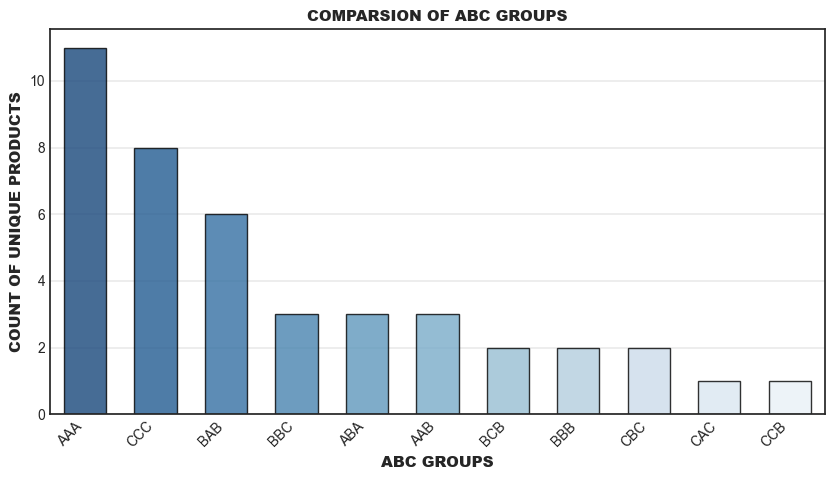

In [43]:
# Отобразим на графике кол-во товаров в каждой группе
fig, ax = plt.subplots(figsize = (10, 5))
# ax.set(ylim = (0, 21), yticks = np.arange(0, 21))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.countplot(
    data = abc,
    x = 'ABC',
    order = abc['ABC'].value_counts(ascending = False).index,
    edgecolor = 'black',
    dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('COMPARSION OF ABC GROUPS', fontsize = 11, fontweight = 800)
ax.set_xlabel('ABC GROUPS', fontsize = 11, fontweight = 800)
ax.set_ylabel('COUNT OF UNIQUE PRODUCTS', fontsize = 11, fontweight = 800)

In [44]:
abc.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount,cumsum_Profit,ABC_Profit,cumsum_Revenue,ABC_Revenue,ABC
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,624,32562.5,151502.50,100.000,C,88.514,B,94.156,B,BCB
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,2896,108721.0,592431.03,76.560,A,71.457,A,72.301,A,AAA
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,2925,33803.9,221305.50,70.246,A,87.534,B,90.777,B,BAB
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,2342,25652.4,163489.68,89.106,B,94.473,B,93.429,B,BBB
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,2327,21673.2,266315.38,90.792,B,95.797,C,88.494,B,BBC


In [45]:
# Зададим отображение числовых данных с разделителем по тысячам
pd.options.display.float_format = '{:,.0f}'.format

In [46]:
# Создадим сводную таблицу по группам ABC с ключевыми характеристиками
abc_pivot = abc.groupby('ABC', as_index = False) \
               .agg(unique_products = ('Amount', 'nunique'),
                    total_amount = ('Amount', 'sum'),
                    total_revenue = ('Revenue', 'sum'),
                    total_profit = ('Profit', 'sum'))
abc_pivot

,ABC,unique_products,total_amount,total_revenue,total_profit
0,AAA,11,66331,"13,081,958","2,321,070"
1,AAB,3,21666,"1,792,184","155,375"
2,ABA,3,7322,"1,640,615","318,086"
3,BAB,6,17604,"1,683,372","194,581"
4,BBB,2,4597,"470,122","63,565"
5,BBC,3,7027,"793,109","61,333"
6,BCB,2,1302,"296,328","58,608"
7,CAC,1,2916,"96,139","15,466"
8,CBC,2,3152,"222,513","29,605"
9,CCB,1,649,"139,529","26,833"


Text(0, 0.5, 'TOTAL AMOUNT')

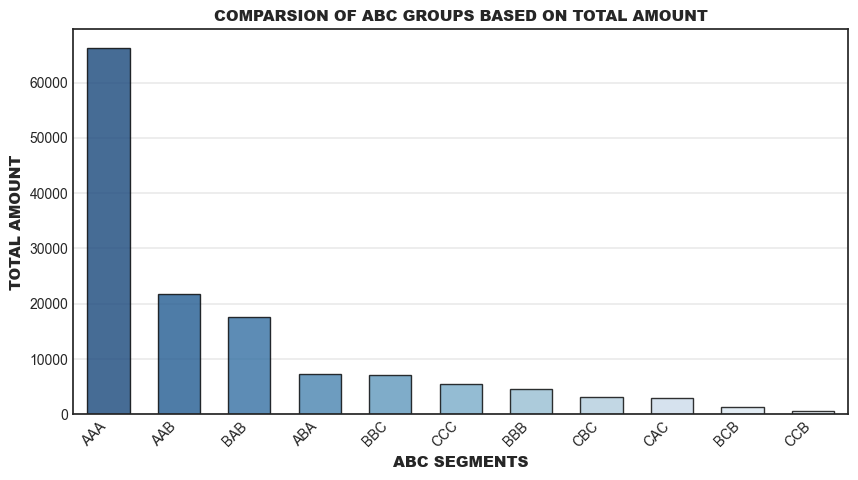

In [68]:
# Сравним на графике группы ABC по общему кол-ву проданных товаров за год
fig, ax = plt.subplots(figsize = (10, 5))
# ax.set(ylim = (0, 21), yticks = np.arange(0, 21))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = abc_pivot,
    x = 'ABC',
    y = 'total_amount',
    order = abc_pivot[['ABC', 'total_amount']].sort_values(by = 'total_amount', ascending = False)['ABC'].tolist(),
    edgecolor = 'black',
    # dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('COMPARSION OF ABC GROUPS BASED ON TOTAL AMOUNT', fontsize = 11, fontweight = 800)
ax.set_xlabel('ABC SEGMENTS', fontsize = 11, fontweight = 800)
ax.set_ylabel('TOTAL AMOUNT', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'TOTAL REVENUE')

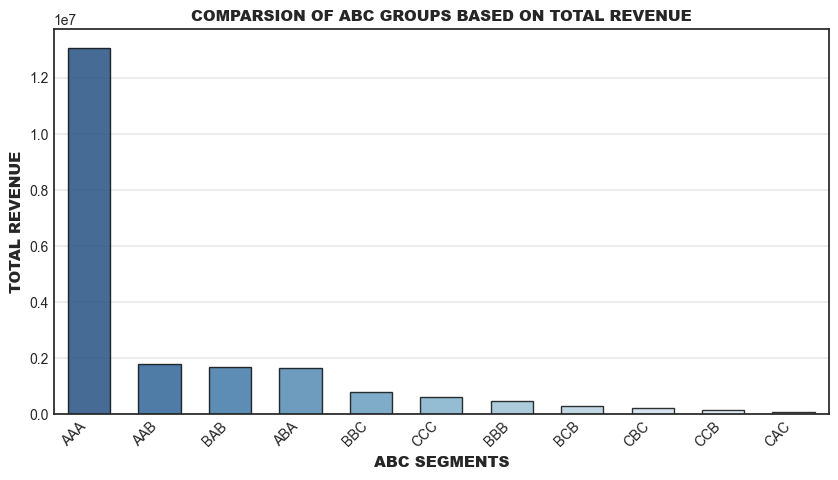

In [69]:
# Сравним на графике группы ABC по общей выручке за год
fig, ax = plt.subplots(figsize = (10, 5))
# ax.set(ylim = (0, 21), yticks = np.arange(0, 21))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = abc_pivot,
    x = 'ABC',
    y = 'total_revenue',
    order = abc_pivot[['ABC', 'total_revenue']].sort_values(by = 'total_revenue', ascending = False)['ABC'].tolist(),
    edgecolor = 'black',
    # dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('COMPARSION OF ABC GROUPS BASED ON TOTAL REVENUE', fontsize = 11, fontweight = 800)
ax.set_xlabel('ABC SEGMENTS', fontsize = 11, fontweight = 800)
ax.set_ylabel('TOTAL REVENUE', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'TOTAL PROFIT')

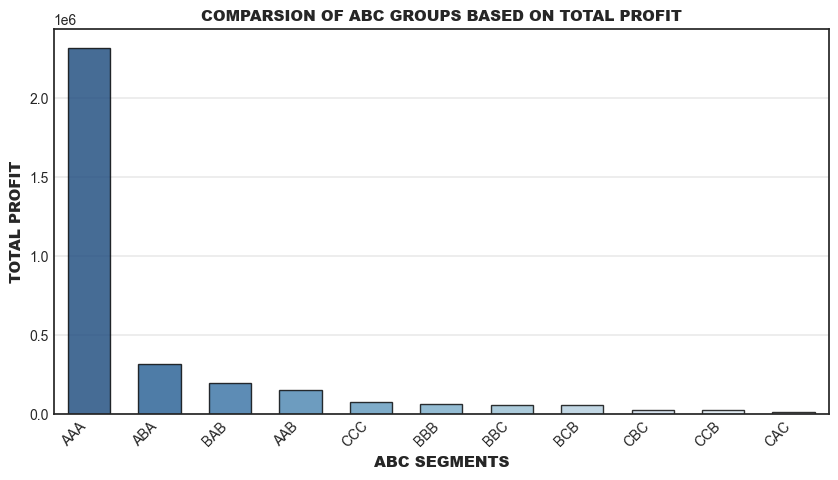

In [70]:
# Сравним на графике группы ABC по общей прибыли за год
fig, ax = plt.subplots(figsize = (10, 5))
# ax.set(ylim = (0, 21), yticks = np.arange(0, 21))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = abc_pivot,
    x = 'ABC',
    y = 'total_profit',
    order = abc_pivot[['ABC', 'total_profit']].sort_values(by = 'total_profit', ascending = False)['ABC'].tolist(),
    edgecolor = 'black',
    # dodge = False,
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('COMPARSION OF ABC GROUPS BASED ON TOTAL PROFIT', fontsize = 11, fontweight = 800)
ax.set_xlabel('ABC SEGMENTS', fontsize = 11, fontweight = 800)
ax.set_ylabel('TOTAL PROFIT', fontsize = 11, fontweight = 800)

#### Выводы:
1. Группа ААА - посмотреть XYZ, чтобы принять решение о поднятии цены
    * если группа Х - можно поднимать цену на короткий период, чтобы увеличить маржинальность. Тестим в течение небольшого периода, чтобы оценить динамику продаж
    * если группа Y/Z, лучше не увеличивать цену, потому что сложно будет оценить влияние. Лучше понять, почему спрос нестабильный. И либо поднять цену, но аккуратно + спланировать эксперимент на более длинный срок, либо не повышать цену (если покупают только по акции)
2. Группа ААВ - нужно найти более выгодную цену поставки, чтобы стать ААА, либо попробовать немного подтянуть цену, если это группа Х по XYZ-анализу
3. Группа АВА - судя по всему - какой-то нишевый продукт, нужно увеличить кол-во продаж, не упав в прибыли. Можно попробовать постепенно:
    * поставить на более видное место + выделить какими-то ценниками или промо-оформлением
    * сделать акцию формата 1 + 1
    * сделать акцию скидка при покупке N штук
4. Группа BAB - товары хорошо продаются, но средняя выручка и доходность. Если они в группе X/Y, стоит попробовать поднять цену и подтянуть выручку и прибыль
5. Группа BBB - середнячки по всем параметрам. Стоит попробовать поднять кол-во продаж, чтобы люди привыкли к этим товарам, после можно пробовать увеличить цену.
    * выставляем на видное место
    * сочно оформляем
    * делаем акцию
6. Группа BBC - группа со средней выручкой и средними продажами, но с плохой доходностью. Стоит попробовать поискать более выгодного поставщика, чтобы подтянуть прибыльность, если удастся, то после можно применять методы для группы BBB.
7. Группа BСВ - группа со средней выручкой и доходностью, но с плохими продажами. Цену не поднять, так как продажи и так плохие. Поэтому пробуем:
    * найти другого поставщика или сбить цену у текущего
    * поставить на кассу
    * выдавать пробники
    * визуально выделить товары
8. Группа CBC - группа с низкой выручкой и доходностью, но со средними продажами, имеет смысл вывести товары из продаж, так как их малое кол-во
9. Группа CBB - группа со средними продажами и доходностью, но с плохой выручкой, имеет смысл вывести товары из продаж, так как их малое кол-во
10. Группа CAC - группа с плохой выручкой и доходностью, но с хорошими продажами. Если эти товары в группе X по XYZ-анализу, имеет смысл поднять цены, чтобы увеличить маржинальность товаров, так как спрос на них хороший.
11. Группа ССС - аутсайдеры по всем параметрам, имеет смысл вывести товары из продаж. При том, что их довольно много - освободим немало места для более маржинальных товаров из других групп.

### Проведем XYZ анализ

In [50]:
abc.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Amount,Profit,Revenue,cumsum_Amount,ABC_Amount,cumsum_Profit,ABC_Profit,cumsum_Revenue,ABC_Revenue,ABC
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,624,"32,562","151,502",100,C,89,B,94,B,BCB
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,2896,"108,721","592,431",77,A,71,A,72,A,AAA
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,2925,"33,804","221,306",70,A,88,B,91,B,BAB
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,2342,"25,652","163,490",89,B,94,B,93,B,BBB
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,2327,"21,673","266,315",91,B,96,C,88,B,BBC


In [51]:
# Создадим новую таблицу с интересующими нас столбцами
xyz = abc[['Product', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
xyz.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195


In [52]:
# Зададим отображение числовых данных с округлением до тысячных
pd.options.display.float_format = '{:.3f}'.format

In [53]:
# Добавим новый столбец, в котором посчитаем стандартное отклонение кол-ва проданных товаров по месяцам для каждого товара
xyz['std_demand'] = xyz[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].std(axis = 1)

In [54]:
# Добавим новый столбец, в котором посчитаем общее кол-во продаж за год для каждого товара
xyz['total_demand'] = xyz[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].sum(axis = 1)

In [55]:
# Добавим новый столбец, в котором посчитаем среднее кол-во продаж за год для каждого товара
xyz['avg_demand'] = xyz['total_demand'] / 12

In [56]:
# Добавим новый столбец, в котором посчитаем коэффициент вариации
xyz['cov_demand'] = xyz['std_demand'] / xyz['avg_demand'] * 100

In [57]:
# Посмотрим на результат отсортировав таблицу по возрастанию значений коэф. вариации
xyz.sort_values(by = 'cov_demand')

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,std_demand,total_demand,avg_demand,cov_demand
25,Running Shoes,575,559,599,611,574,603,627,609,568,584,562,647,27.462,7118,593.167,4.630
37,Titak watch,582,561,561,649,626,598,561,652,585,594,629,674,39.101,7272,606.000,6.452
34,Suits,656,564,674,568,636,542,607,607,566,571,570,556,42.586,7117,593.083,7.180
17,Fossil Watch,609,558,616,518,564,613,593,590,670,641,539,604,42.805,7115,592.917,7.219
33,Sports Wear,636,580,654,522,576,623,614,666,596,632,604,692,45.432,7395,616.250,7.372
35,T - Shirts,545,542,604,564,592,596,657,682,665,625,607,613,44.840,7292,607.667,7.379
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,19.297,2925,243.750,7.917
19,Jeans,581,479,649,542,597,623,576,637,618,615,560,621,47.647,7098,591.500,8.055
27,Shirts,610,500,644,598,660,569,616,591,543,665,579,524,52.031,7099,591.583,8.795
14,Dinning Tables,236,235,239,227,266,287,258,258,203,262,253,234,21.940,2958,246.500,8.901


In [58]:
# Присвоим группы X, Y или Z в зависимости от значения коэф. вариации.
# Если коэф. вариации <= 15% то это группа X, если <= 25% то это группа Y, все остальное это группа Z.
xyz['XYZ_group'] = np.where(xyz['cov_demand'] <= 15, 'X', np.where(xyz['cov_demand'] <= 25, 'Y', 'Z'))

In [59]:
xyz.head()

,Product,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,std_demand,total_demand,avg_demand,cov_demand,XYZ_group
0,Apple Laptop,56,39,29,45,64,53,56,68,37,60,50,67,12.424,624,52.000,23.893,Y
1,Bed Sheets,210,213,267,271,217,238,273,198,249,194,258,308,35.456,2896,241.333,14.692,X
2,Beds,230,213,280,227,232,250,265,248,243,224,255,258,19.297,2925,243.750,7.917,X
3,Bike Tyres,179,131,224,171,207,210,222,217,163,224,191,203,29.070,2342,195.167,14.895,X
4,Car & Bike Care,219,203,196,198,207,238,173,214,168,135,181,195,26.966,2327,193.917,13.906,X


In [60]:
# Посмотрим сколько в каждой группе товаров
xyz['XYZ_group'].value_counts()

X    29
Y     9
Z     4
Name: XYZ_group, dtype: int64

In [61]:
# Посмотрим на сводную таблицу по группам XYZ с ключевыми характеристиками
xyz_pivot = xyz.groupby('XYZ_group', as_index = False) \
               .agg(unique_products = ('Product', 'nunique'),
                    total_demand = ('total_demand', 'sum'),
                    std_demand = ('std_demand', 'mean'),
                    avg_demand = ('avg_demand', 'mean'),
                    avg_cov_demand = ('cov_demand', 'mean'))
xyz_pivot

,XYZ_group,unique_products,total_demand,std_demand,avg_demand,avg_cov_demand
0,X,29,125848,34.423,361.632,10.673
1,Y,9,9407,16.463,87.102,20.075
2,Z,4,2728,16.641,56.833,29.341


In [62]:
# Создадим сводную таблицу по группам XYZ, в которой будут суммарные продажи по кол-ву товара для каждого месяца и для каждой группы
xyz_df = xyz.groupby('XYZ_group')[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].sum()
xyz_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
XYZ_group,,,,,,,,,,,,
X,10631,9360,10828,10025,10568,10486,10916,10769,10363,10601,10396,10905
Y,769,785,869,793,735,825,728,799,734,876,683,811
Z,220,191,231,250,214,187,182,243,263,306,253,188


In [63]:
# Изменим представление таблицы
xyz_graph = xyz_df.unstack('XYZ_group') \
                  .to_frame() \
                  .reset_index() \
                  .rename(columns = {'level_0': 'Month', 0: 'Demand'})
xyz_graph.head()

,Month,XYZ_group,Demand
0,Jan,X,10631
1,Jan,Y,769
2,Jan,Z,220
3,Feb,X,9360
4,Feb,Y,785


Text(0, 0.5, 'DEMAND')

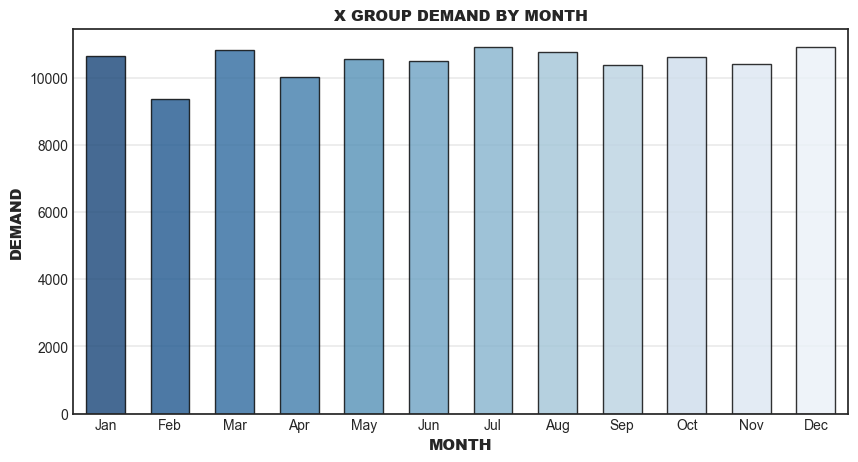

In [64]:
# Посмотрим на спрос групы X по месяцам
fig, ax = plt.subplots(figsize = (10, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = xyz_graph.query("XYZ_group == 'X'"),
    x = 'Month',
    y = 'Demand',
    edgecolor = 'black',
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('X GROUP DEMAND BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTH', fontsize = 11, fontweight = 800)
ax.set_ylabel('DEMAND', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'DEMAND')

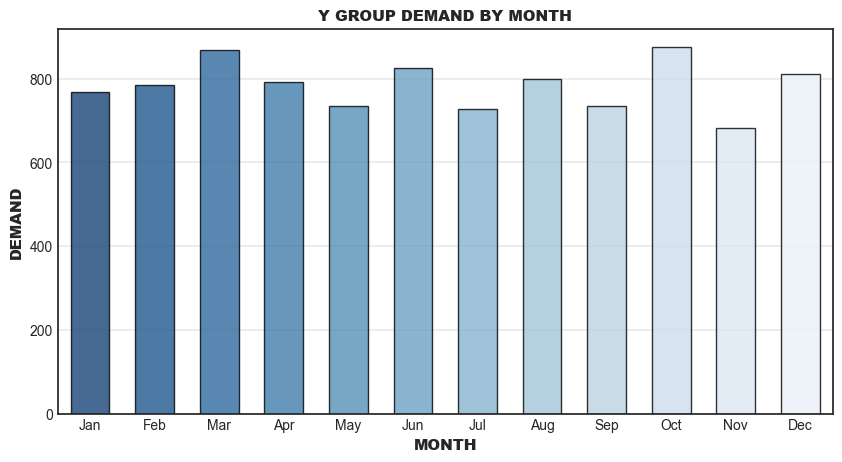

In [65]:
# Посмотрим на спрос групы Y по месяцам
fig, ax = plt.subplots(figsize = (10, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = xyz_graph.query("XYZ_group == 'Y'"),
    x = 'Month',
    y = 'Demand',
    edgecolor = 'black',
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('Y GROUP DEMAND BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTH', fontsize = 11, fontweight = 800)
ax.set_ylabel('DEMAND', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'DEMAND')

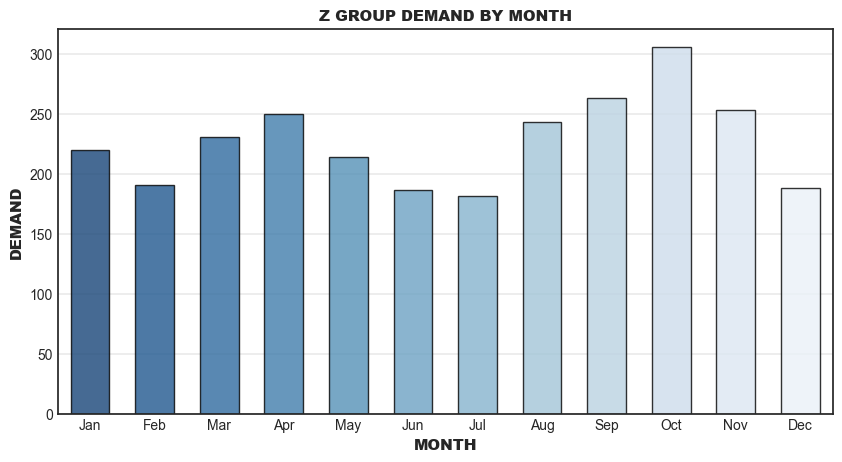

In [66]:
# Посмотрим на спрос групы Z по месяцам
fig, ax = plt.subplots(figsize = (10, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = xyz_graph.query("XYZ_group == 'Z'"),
    x = 'Month',
    y = 'Demand',
    edgecolor = 'black',
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('Z GROUP DEMAND BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTH', fontsize = 11, fontweight = 800)
ax.set_ylabel('DEMAND', fontsize = 11, fontweight = 800)

Text(0, 0.5, 'DEMAND')

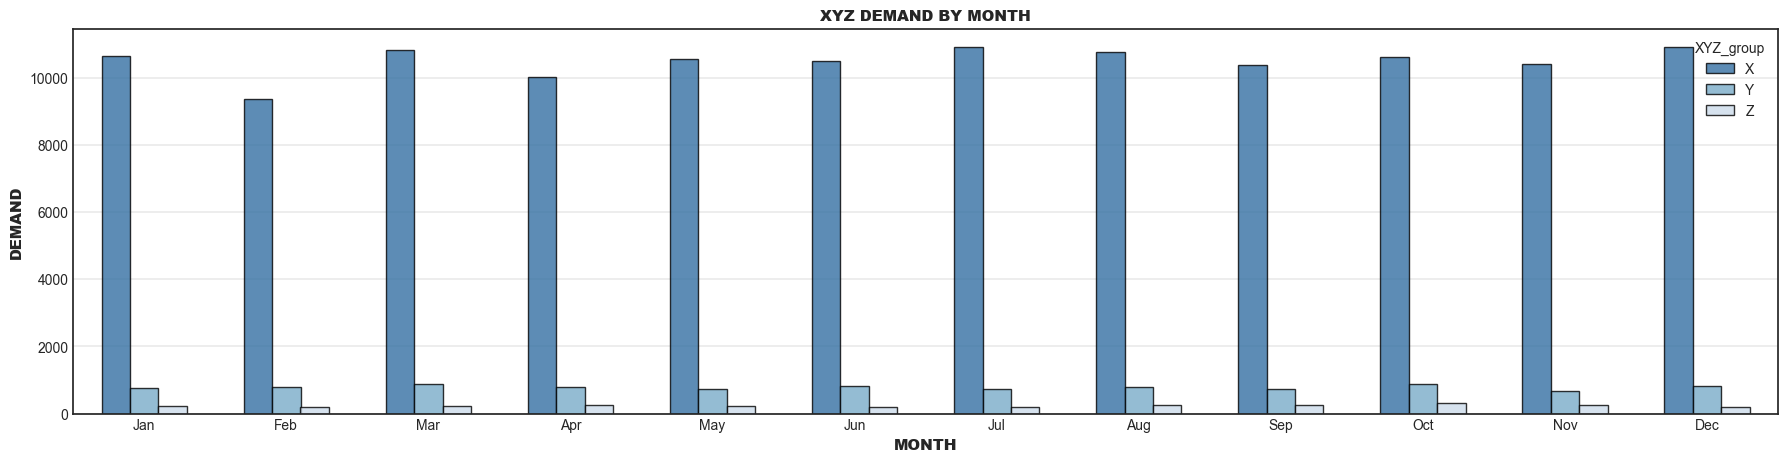

In [67]:
# Сравним спрос по всем группам XYZ за каждый месяц
fig, ax = plt.subplots(figsize = (22, 5))
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.1)
sns.barplot(
    data = xyz_graph,
    x = 'Month',
    y = 'Demand',
    hue = 'XYZ_group',
    edgecolor = 'black',
    alpha = 0.8,
    width = 0.6,
    linewidth = 1,
    palette = 'Blues_r'
    )
ax.set_title('XYZ DEMAND BY MONTH', fontsize = 11, fontweight = 800)
ax.set_xlabel('MONTH', fontsize = 11, fontweight = 800)
ax.set_ylabel('DEMAND', fontsize = 11, fontweight = 800)

### Выводы:
* Товары группы X имеют стабильный спрос на протяжении всего года с небольшой просадкой в феврале. Спрос на эти товары в несколько раз больше (в 10-30 раз) спроса на товары групп Y и Z.
* Товары группы Y имеют сезонный спрос, в среднем по году просадки наблюдаются в начале года, далее, начиная с апреля, просадки чередуются со средним спросом
* Товары группы Z имеют самый нестабильный спрос за год. Самый большой спрос наблюдается осенью, в остальное время все нестабильно.

### Понимание классов:
* AX
    * Высокий ранг
    * Устойчивый спрос
    * Легко прогнозируются
    * Легко управляются
* BX
    * Средний ранг
    * Устойчивый спрос
    * Легко прогнозируются
    * Легко управляются
* CX
    * Низкий ранг
    * Устойчивый спрос
    * Легко прогнозируются
    * Легко управляются
* AY
    * Высокий ранг
    * Изменчивый спрос
    * Сложнее прогнозируются
    * Сложнее управляются
* BY
    * Средний ранг
    * Изменчивый спрос
    * Сложнее прогнозируются
    * Сложнее управляются
* CY
    * Низкий ранг
    * Изменчивый спрос
    * Сложнее прогнозируются
    * Сложнее управляются
* AZ
    * Высокий ранг
    * Спонтанный спрос
    * Трудно прогнозируются
    * Трудно управляются
* BZ
    * Средний ранг
    * Спонтанный спрос
    * Трудно прогнозируются
    * Трудно управляются
* CZ
    * Низкий ранг
    * Спонтанный спрос
    * Трудно прогнозируются
    * Трудно управляются

### Матрица рекомендаций управления складскими запасами:
* AX
    * Автоматическое пополнение запасов
    * Поставки JIT, низкий страховой запас
    * Постоянный складской запас
* BX
    * Автоматическое пополнение запасов
    * Периодическая корректировка прогнозирования
    * Низкий страховой запас
* CX
    * Автоматическое пополнение запасов
    * Периодическая оценка эффективности
    * Низкий страховой запас
* AY
    * Полуавтоматическое пополнение запасов
    * Низкий страховой запас
* BY
    * Полуавтоматическое пополнение запасов
    * Увеличиваемый сезонный страховой запас
* CY
    * Полуавтоматическое пополнение запасов
    * Высокий страховой запас
* AZ
    * Закупки под заказ
    * Без страхового запаса
    * Без складских остатков
* BZ
    * Закупки под заказ
    * Без страхового запаса
    * Удлиненный срок выполнения заказов
    * Без складских остатков
* CZ
    * Автоматическое пополнение запасов
    * Высокий страховой запас
    * Периодическая оценка целесообразности поддержания позиций в ассортименте